> # **Text-Cleaning and Linguistic Structure**
**Pre-processing is modeling**
1. Tokenization
2. Stopword
3. Part of speech
4. Stemming
5. Lemmatization
6. NER - Name Entity Recoginer

> **Tokenization**
- converts paragraph -> sentences -> words -> characters
- Process of splitting the text into meaningful segments.
- spacy.blank('en') for english words like hin for hindi

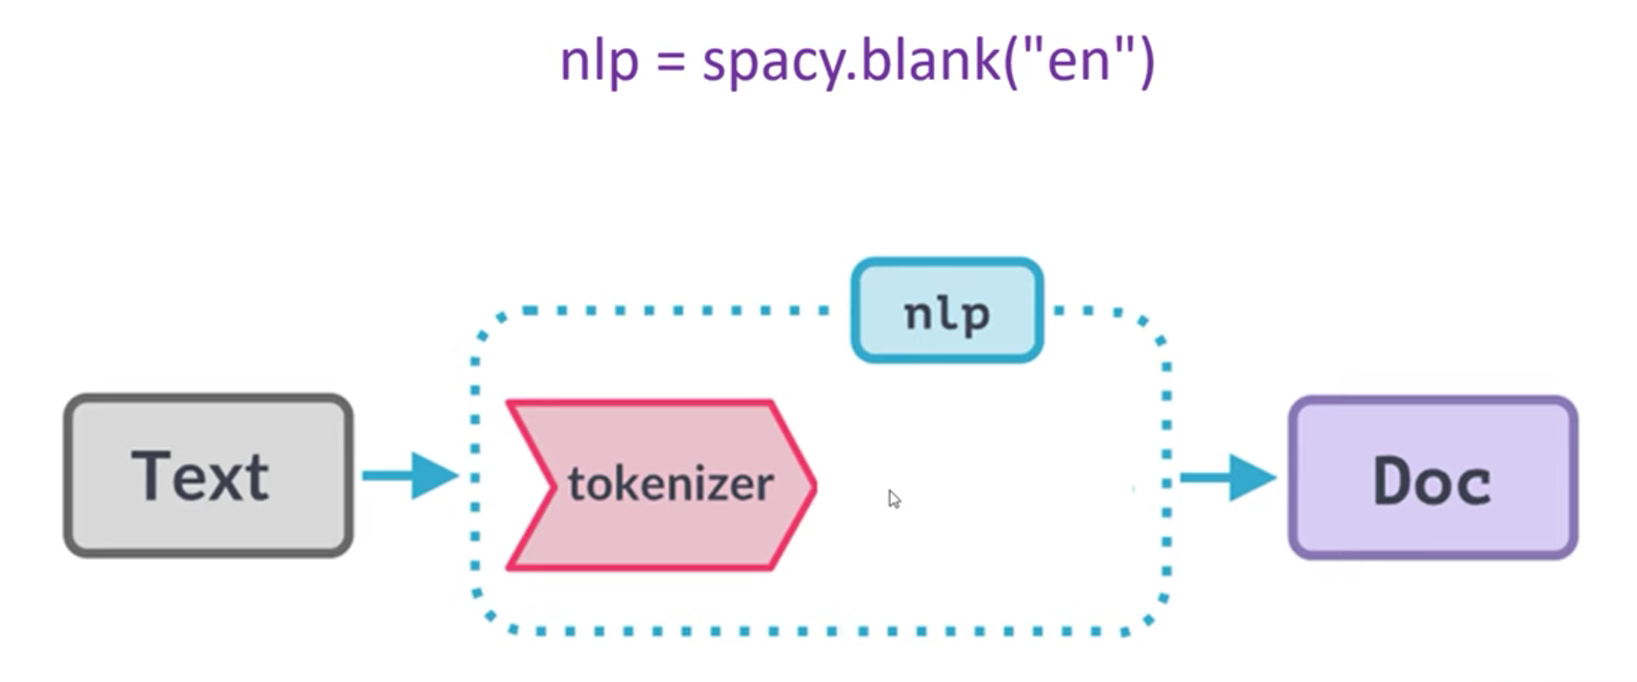

- similar for spacy.load() it creates a complete pre-trained pipline

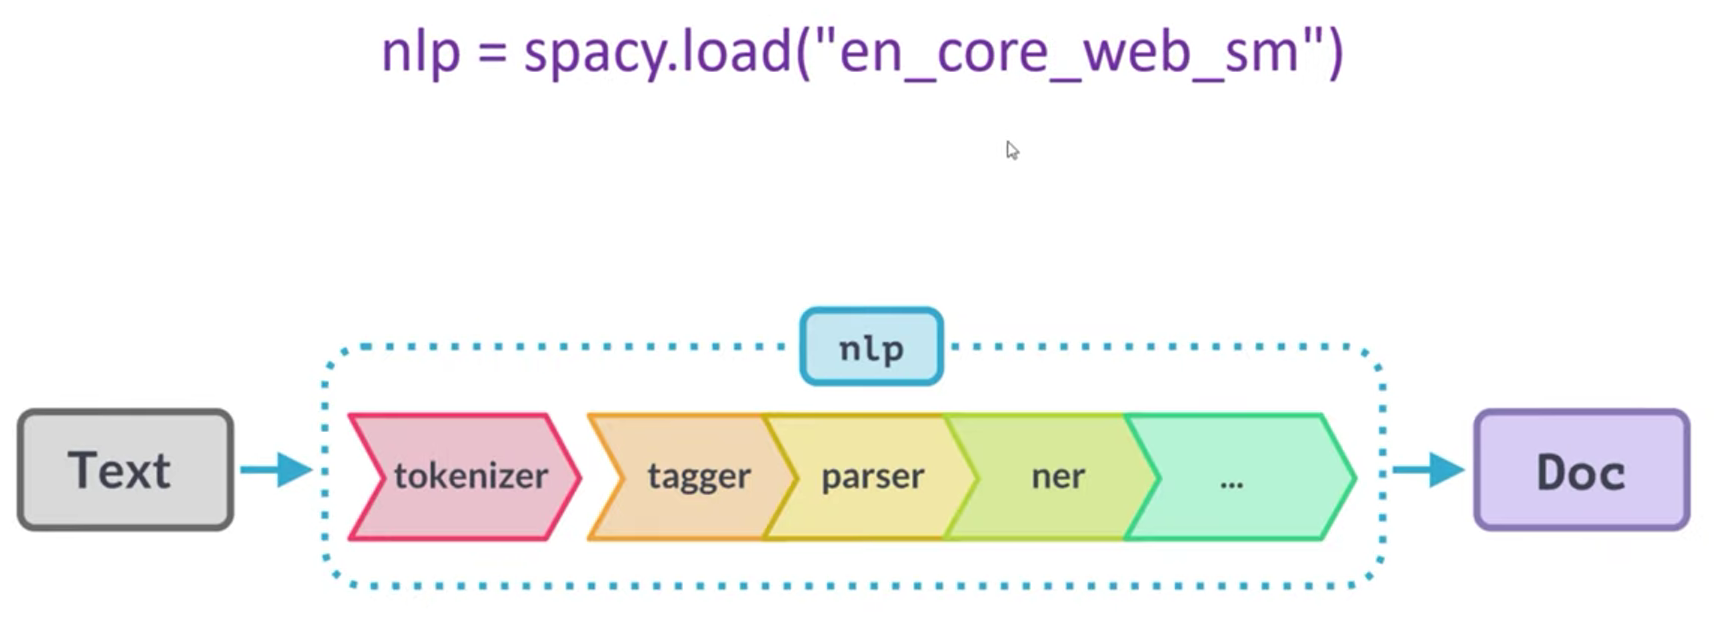

In [14]:
import spacy
nlp = spacy.blank('en')

> **Tokenization**
- Word tokenization
- Sentence tokenization

In [15]:
docs = nlp("A Doc is a sequence of Token objects. Access sentences and named entities, export annotations to numpy arrays, losslessly serialize to compressed binary strings.")

for token in docs:
  print(token, docs[2])

A is
Doc is
is is
a is
sequence is
of is
Token is
objects is
. is
Access is
sentences is
and is
named is
entities is
, is
export is
annotations is
to is
numpy is
arrays is
, is
losslessly is
serialize is
to is
compressed is
binary is
strings is
. is


In [29]:
# Step 1: Add sentencizer only if not present
if "sentencizer" not in nlp.pipe_names:
    nlp.add_pipe("sentencizer")

# Step 2: Re-process the text AFTER adding component
docs = nlp("A Doc is a sequence of Token objects. Access sentences and named entities, export annotations to numpy arrays, losslessly serialize to compressed binary strings.")

# Step 3: Extract sentences
sentences = [sent.text for sent in docs.sents]

print(sentences[:3])


['A Doc is a sequence of Token objects.', 'Access sentences and named entities, export annotations to numpy arrays, losslessly serialize to compressed binary strings.']


In [18]:
nlp = spacy.load('en_core_web_sm')
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

> **NER- Nmae Entity Recognizer**
- search the name and entitle with the label

In [19]:
doc = nlp("Google is a multinational technology company best known for its search engine, offering a wide range of internet services, software, hardware, and AI products.")

for token in doc:
  print(token, "|", token.pos_, "|", token.lemma_)

Google | PROPN | Google
is | AUX | be
a | DET | a
multinational | ADJ | multinational
technology | NOUN | technology
company | NOUN | company
best | ADV | well
known | VERB | know
for | ADP | for
its | PRON | its
search | NOUN | search
engine | NOUN | engine
, | PUNCT | ,
offering | VERB | offer
a | DET | a
wide | ADJ | wide
range | NOUN | range
of | ADP | of
internet | NOUN | internet
services | NOUN | service
, | PUNCT | ,
software | NOUN | software
, | PUNCT | ,
hardware | NOUN | hardware
, | PUNCT | ,
and | CCONJ | and
AI | PROPN | AI
products | NOUN | product
. | PUNCT | .


In [20]:
doc = nlp('Google is a multinational technology company best known for its search engine, offering a wide range of internet services, software, hardware, and AI products.')

for ent in doc.ents:
  print(ent.text, "|", ent.label_, "|", spacy.explain(ent.label_))

from spacy import displacy
displacy.render(doc, style='ent')

nlp.pipe_labels['ner']

Google | ORG | Companies, agencies, institutions, etc.
AI | ORG | Companies, agencies, institutions, etc.


['CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART']

> **Stemming**
- use fixed rules such as remove able, ing etc. to dervie the base word called stemming.

In [21]:
import nltk

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

words = ['eating', 'eats', 'eat', 'ate', 'adjustable', 'rafting', 'ability', 'meeting']

for word in words:
  print(word, "|", stemmer.stem(word))

eating | eat
eats | eat
eat | eat
ate | ate
adjustable | adjust
rafting | raft
ability | abil
meeting | meet


> **Lemmatization**
- Here you need knownledge of a language( called linguistic knowledge) to dervie the base word called lemmatization.

In [22]:
doc = nlp("eating, eats, eat, ate, adjustable, rafting, ability, meeting")

for token in doc:
  print(token, "|", token.lemma_)

eating | eat
, | ,
eats | eat
, | ,
eat | eat
, | ,
ate | ate
, | ,
adjustable | adjustable
, | ,
rafting | rafting
, | ,
ability | ability
, | ,
meeting | meeting


> **Part Of Speech**
- Basic fundamentals of english grammer such as noun, pronoun, verb, adjective etc.

In [23]:
doc = nlp('Google is a multinational technology company best known for its search engine, offering a wide range of internet services, software, hardware, and AI products.')

for token in doc:
  print(doc[1].text, "|", token, "|", token.pos_, "|", spacy.explain(token.pos_), "|", token.tag_, "|", spacy.explain(token.tag_))

is | Google | PROPN | proper noun | NNP | noun, proper singular
is | is | AUX | auxiliary | VBZ | verb, 3rd person singular present
is | a | DET | determiner | DT | determiner
is | multinational | ADJ | adjective | JJ | adjective (English), other noun-modifier (Chinese)
is | technology | NOUN | noun | NN | noun, singular or mass
is | company | NOUN | noun | NN | noun, singular or mass
is | best | ADV | adverb | RBS | adverb, superlative
is | known | VERB | verb | VBN | verb, past participle
is | for | ADP | adposition | IN | conjunction, subordinating or preposition
is | its | PRON | pronoun | PRP$ | pronoun, possessive
is | search | NOUN | noun | NN | noun, singular or mass
is | engine | NOUN | noun | NN | noun, singular or mass
is | , | PUNCT | punctuation | , | punctuation mark, comma
is | offering | VERB | verb | VBG | verb, gerund or present participle
is | a | DET | determiner | DT | determiner
is | wide | ADJ | adjective | JJ | adjective (English), other noun-modifier (Chinese)


> **Stopword**
- which are filtered out ("stopped") before or after processing of natural language data because they are deemed to have little semantic value or are otherwise insignificant for the task at hand.

In [26]:
from spacy.lang.en.stop_words import STOP_WORDS

no_stop_words = [token.text for token in doc if not token.is_stop and not token.is_punct]
print(no_stop_words)

['Google', 'multinational', 'technology', 'company', 'best', 'known', 'search', 'engine', 'offering', 'wide', 'range', 'internet', 'services', 'software', 'hardware', 'AI', 'products']
